# Introduction:
                     This project is about machine learning(Artificial intelligence).In this project, we have created many classification models to find out which model is best for this project and we are not using sklearn library for modeling the data. We only used preprocessing libraries like Pandas, Numpy,matplotlib, seaborn, etc and we have created classification models from scratch. We have done hyperparameter tuning and created very intense functions and loops.

## About Dataset:
                         for this project, we are going to use Wine quality Dataset. Wine quality dataset is used to predict the quality of wine wether it is good(1) or bad(0). We got this dataset from kaggle In this dataset There is no target column ,so we have to create a target column (Good/bad )which will describe the quality of wine .This Dataset contains 13 Feature columns .
## What we are going to do?
    There Following steps we are going to perform:
    step 1: Import necessary libraries for preprocessing.
    Step 2: Clean the data set and do Exploratory data analysis.
    Step 3: Find The Strong Correlated columns.
    step 4: Remove the outliers.
    step 5: Do Gaussian Normal distribution testing.
    step 6: Do Feature Scaling.
    step 7: Split the dataset into test and train and then fit and predict the models.
    step 8: Model Trainig
    step 9: Do HyperParameter Tuning to find the best hyperparameters for models.
    step 10: Give Conclusion.

># Step 1: Impoort necessary libraries for preprocessing.

In [1]:
import pandas as pd # Pandas library is used to structure the data and operations for manipulating numerical tables and time series
import numpy as np  # NumPy is a Python library used for working and also use for mathematical operations 
import matplotlib.pyplot as plt # matplotlib is used for data visualization and use to create canvas and also use for styling
import seaborn as sns# Seaborn is also use for data visualization.Matplotlib and Seaborn work together
from matplotlib import style # For styling the graphs
import random      # importing the random values
import warnings
warnings.filterwarnings("ignore")
style.use('ggplot')
%matplotlib inline

We are going to import dataset  and creat a dataframe

In [2]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Create a Target column (Good/Bad):
Now we have to create a target column which will describe quality of wine in 0 and 1 format ,0 means bad quality and 1 means good quality

In [3]:
df['Good/Bad'] = [1 if x >= 7 else 0 for x in df['quality']] # Target column

In [4]:
#Now we don't need the quality column because we have target  column so we are going to drop quality column
df.drop('quality',axis=1,inplace=True)

># Step 2:Clean the data set and do Exploratory data analysis.

In [5]:
print("null values of columns",df.isnull().sum())

null values of columns type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
Good/Bad                 0
dtype: int64


In [6]:
df["fixed acidity"]=df["fixed acidity"].fillna(df["fixed acidity"].mean())
df["volatile acidity"]=df["volatile acidity"].fillna(df["volatile acidity"].mean())
df.dropna(axis=0,inplace=True)
print("null values of columns",df.isnull().sum())

null values of columns type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Good/Bad                0
dtype: int64


## Plotting the Scatter plot to see the linear relationship b/w columns

Text(0.5, 1.0, 'free sulfur dioxide VS citric acid ')

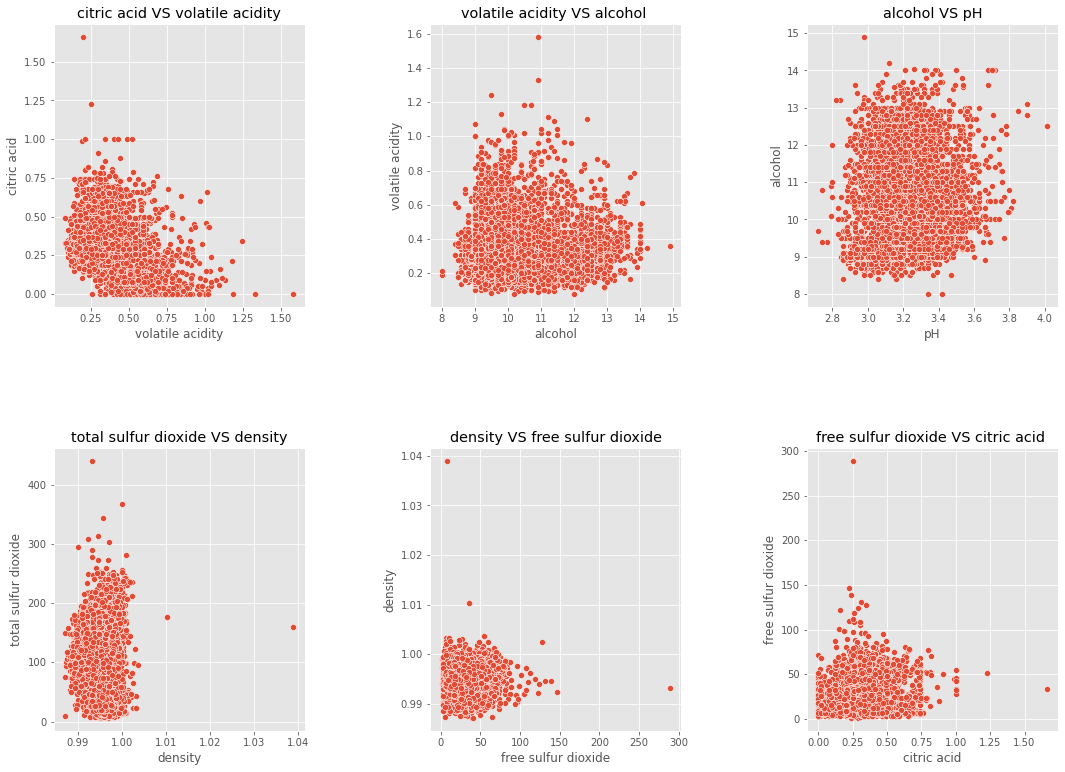

In [7]:
fig,ax=plt.subplots(2,3,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax=ax.flatten()
sns.scatterplot(y=df["citric acid"],x=df["volatile acidity"],ax=ax[0])
sns.scatterplot(y=df["volatile acidity"],x=df["alcohol"],ax=ax[1])
sns.scatterplot(y=df["alcohol"],x=df["pH"],ax=ax[2])
sns.scatterplot(y=df["total sulfur dioxide"],x=df["density"],ax=ax[3])
sns.scatterplot(y=df["density"],x=df["free sulfur dioxide"],ax=ax[4])
sns.scatterplot(y=df["free sulfur dioxide"],x=df["citric acid"],ax=ax[5])
ax[0].set_title("citric acid VS volatile acidity")
ax[1].set_title("volatile acidity VS alcohol ")
ax[2].set_title("alcohol VS pH")
ax[3].set_title("total sulfur dioxide VS density")
ax[4].set_title("density VS free sulfur dioxide")
ax[5].set_title("free sulfur dioxide VS citric acid ")

These plots show that there is a very less linear relationship between the columns

># Step 3: Find The Strong Correlated columns:
## Correlation Testing:
Correlation test is used to evaluate the association between two or more variables. For instance, if we are interested to know whether there is a relationship between the heights of fathers and sons, a correlation coefficient can be calculated to answer this question.

In [8]:
# I am going to create a mask for heatmap.i want to see heatmap in triangle shape
mask = np.zeros_like(df.corr()) # Create a maske for heatmap
triangle_indeces=np.triu_indices_from(mask) # arranging the mask variables in triagular shape
mask[triangle_indeces] =True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

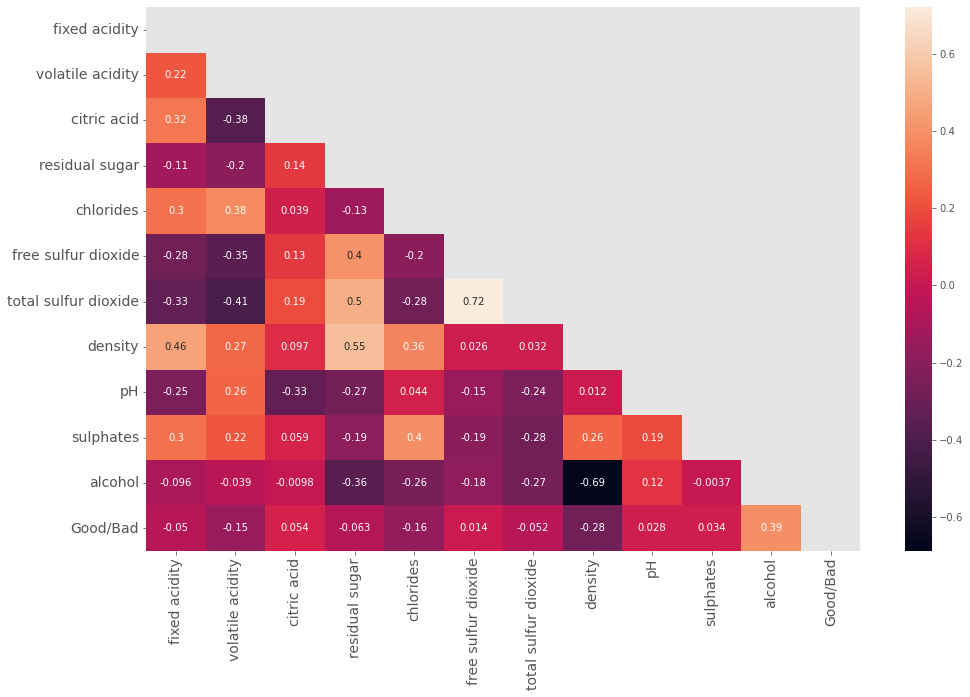

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap shows that there very few columns that are strongly correlated. This dataset contains many weeks of correlated columns
### Columns which are Strongly correlated:
1. <font color =blue>total sulfur dioxide </font> strongly correlated with <font color =red>free sulfur dioxide</font>.
2. <font color =blue>alcohol</font> strongly correlated with  <font color =red>density</font>.
3. <font color =blue>total sulfur dioxide</font> strongly correlated with <font color =red>residual sugar</font>.
4. <font color =blue>density</font> strongly correlated with <font color =red>chloride</font>.
**Hence there are many columns which are strongly correlated to each other which is a good sign for prediction**

## Checking the Correlation of Features columns with Target column(Good/Bad)

<AxesSubplot:title={'center':'Correlation of feature columns with Good/Bad column'}>

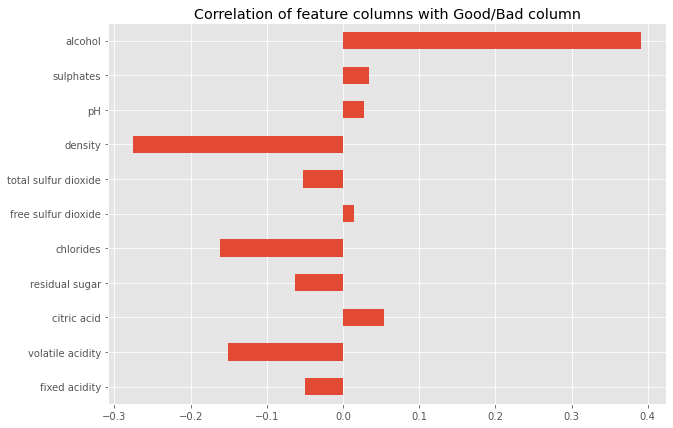

In [10]:
df.drop("Good/Bad",axis=1).corrwith(df["Good/Bad"]).plot(kind="barh", figsize=(10, 7)
                                                             ,title="Correlation of feature columns with Good/Bad column")

This plot shows that <font color=red>alcohol , density</font> is highly correlated with the target column so these columns is higly effective on  prediction

## Ploting a histogram for correlation only for features
Here we are again going to create a mask as we created before and then arrange mask into a triangular shape and then create a data frame of correlation with the mask

In [11]:
features_cols = df.columns[:-1]
corr_values = df[features_cols ].corr()
tril_index = np.tril_indices_from(corr_values)
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns ,  index = corr_values.index)
corr_values = (corr_values
              .stack()
              .to_frame()
              .reset_index()
              .rename(columns={'level_0':'feature1',
                      'level_1':'feature2',
                      0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()

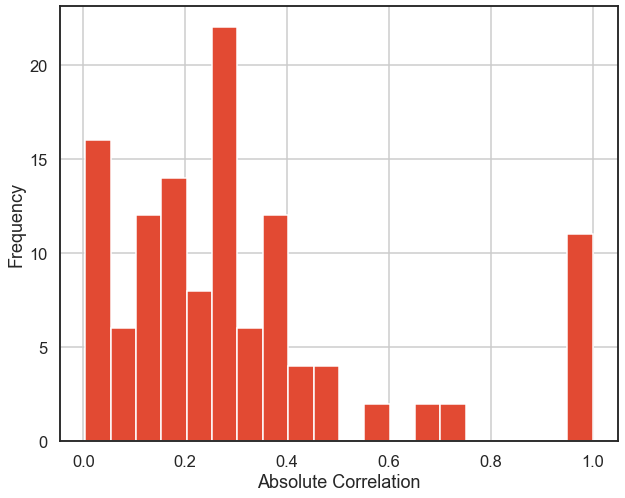

In [12]:
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins = 20 ,figsize=(10,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency');

This histogram shows that there are most of those columns that are correlated with each other which is a good sign

># Step 4:Remove the outliers
## Outliers Detection:
Outlier Affect on variance, and standard deviation of a data distribution. In a data distribution, with extreme outliers, the distribution is skewed in the direction of the outliers which makes it difficult to analyze the data.so it is important to remove the outliers.

Text(0.5, 1.0, 'free sulfur dioxide contains many outliers')

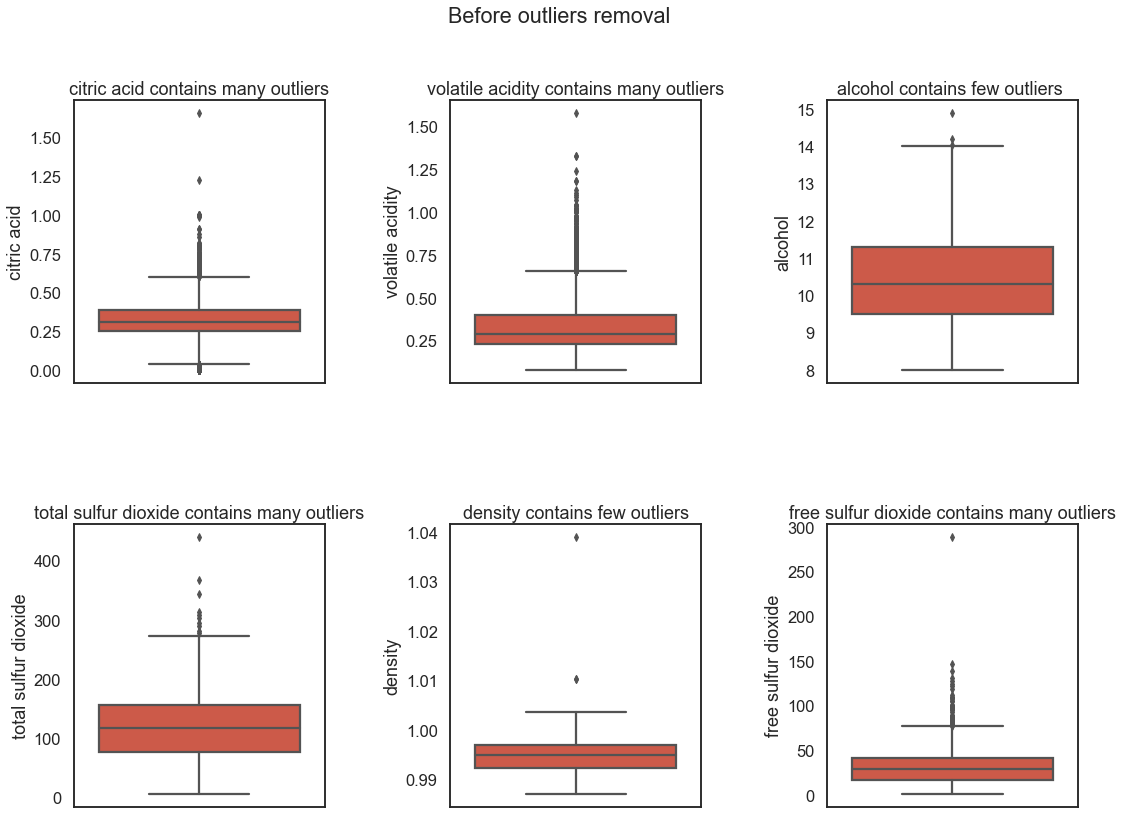

In [13]:
fig,ax=plt.subplots(2,3,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("Before outliers removal")
ax=ax.flatten()
sns.boxplot(y=df["citric acid"],ax=ax[0])
sns.boxplot(y=df["volatile acidity"],ax=ax[1])
sns.boxplot(y=df["alcohol"],ax=ax[2])
sns.boxplot(y=df["total sulfur dioxide"],ax=ax[3])
sns.boxplot(y=df["density"],ax=ax[4])
sns.boxplot(y=df["free sulfur dioxide"],ax=ax[5])
ax[0].set_title("citric acid contains many outliers")
ax[1].set_title("volatile acidity contains many outliers")
ax[2].set_title("alcohol contains few outliers ")
ax[3].set_title("total sulfur dioxide contains many outliers")
ax[4].set_title("density contains few outliers")
ax[5].set_title("free sulfur dioxide contains many outliers")

With the help of a boxplot, we can find out outliers in Dataset. as you can that this dataset is that this contains many outliers so we  have to remove  this outliers.*The dotted line is outliers*.

## Z_score method to remove the outliers:
FORMULA :<br> 
Column $-$ mean of column  $/$  Standard deviation of column<br>.
_______________________________
If <font color=blur>z_score</font> of columns ><font color=green>3</font>:<br>
then it contains  outliers<br>
if <font color=blur>z_score</font> columns < <font color=green>-3</font> :<br>
then it contains outliers<br>
for perfect Dataset Z_score must be between -3 and 3.


**Demo for Z_score method:**<br>
Find the mean and Standarddeviation of the column

In [19]:
print("mean=",df["free sulfur dioxide"].mean())
print("std=",df["free sulfur dioxide"].std())

mean= 30.513740929442644
std= 17.749852225403604


<font color=blue>Mean + 3 * Standarddeviation</font><br>
<font color=red>Mean - 3 * Standarddeviation</font><br>
if df[column]> <font color=blue>Mean + 3 * Standarddeviation</font><br>
and df[column] < <font color=red>Mean - 3 * Standarddeviation</font><br>
then remove those columns

### put mean and std in z_score formula

In [20]:
#                  Mean of Column   + 3 * Standard deviation of Column
print("3:Z_score ",30.513740929442644+3*17.749852225403604)
#                  Mean of Column   - 3 * Standard deviation of Column
print("-3:Z_score ",30.513740929442644-3*17.749852225403604)

3:Z_score  83.76329760565346
-3:Z_score  -22.73581574676817


### Find those DataFrame which contains outiers with the help of z_score

In [21]:
df1=df[~(df["fixed acidity"]>11.106828882050522)|(df["fixed acidity"]<3.3263297428916383)]
df2=df1[~(df1["volatile acidity"]>0.8336381014976812)|(df1["volatile acidity"]<-0.15425607036807631)]
df3=df2[~(df2["total sulfur dioxide"]>285.31013798685353)|(df2["total sulfur dioxide"]<-53.82098914892836)]
df4=df3[~(df3["alcohol"]>14.069936077756434)|(df3["alcohol"]<6.913665584542588)]
df5=df4[~(df4["density"]>1.0036926528421508)|(df4["density"]<0.9857006148198366)]
df6=df5[~(df5["citric acid"]>0.7545162987377465)|(df5["citric acid"]<-0.11707250446612166)]
df7=df6[~(df6["sulphates"]>0.9776575187309238)|(df6["sulphates"]<0.08477279083322525)]
df8=df7[~(df7["chlorides"]>0.1611496461215684)|(df7["chlorides"]<-0.04906650524396978)]
df9=df8[~(df8["free sulfur dioxide"]>83.77351869418224)|(df8["free sulfur dioxide"]<-22.722879937833156)]
df_clean=df9.copy()
df_clean

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good/Bad
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


**Now Dataset is pretty clean so we can now further proceed**

Text(0.5, 1.0, 'free sulfur dioxide is clean')

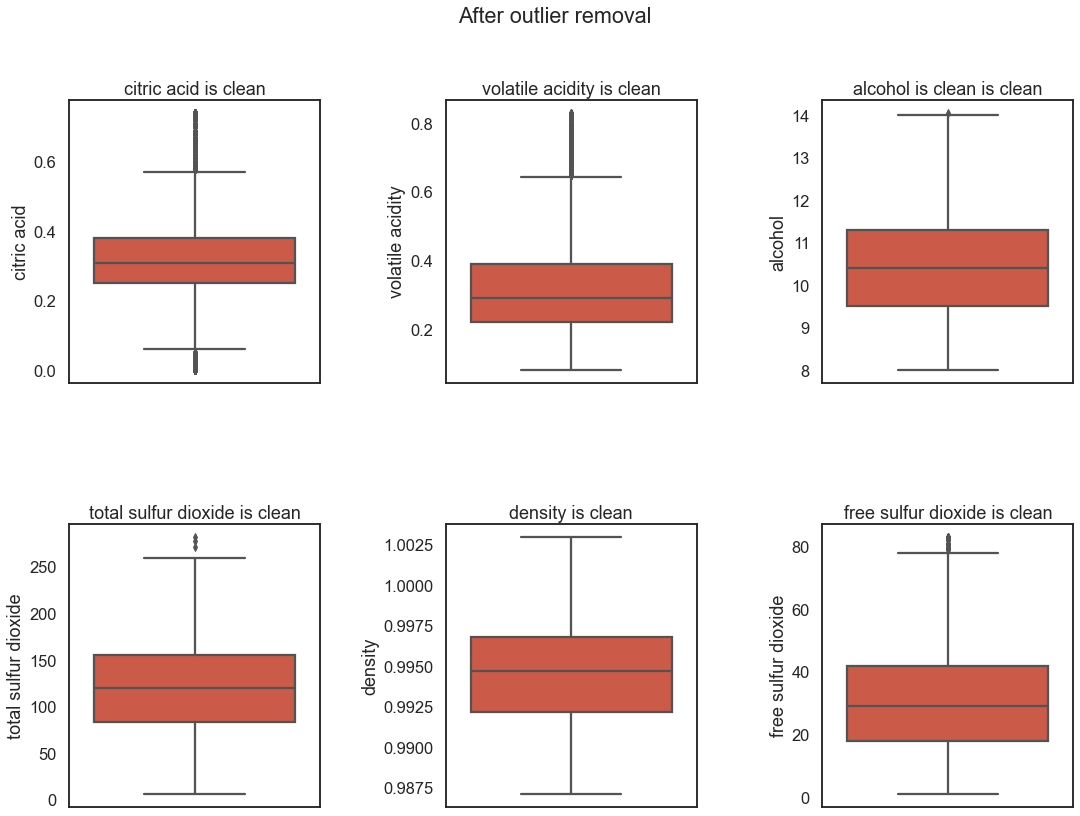

In [22]:
fig,ax=plt.subplots(2,3,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.suptitle("After outlier removal")
ax=ax.flatten()
sns.boxplot(y=df_clean["citric acid"],ax=ax[0])
sns.boxplot(y=df_clean["volatile acidity"],ax=ax[1])
sns.boxplot(y=df_clean["alcohol"],ax=ax[2])
sns.boxplot(y=df_clean["total sulfur dioxide"],ax=ax[3])
sns.boxplot(y=df_clean["density"],ax=ax[4])
sns.boxplot(y=df_clean["free sulfur dioxide"],ax=ax[5])
ax[0].set_title("citric acid is clean")
ax[1].set_title("volatile acidity is clean")
ax[2].set_title("alcohol is clean is clean")
ax[3].set_title("total sulfur dioxide is clean")
ax[4].set_title("density is clean")
ax[5].set_title("free sulfur dioxide is clean")

These boxplots clearing  show that our data is pretty clean now 

># Step 5:do Gaussian Normal distribution testing.
## Gaussian Normal Distribution Testing:
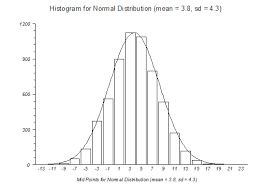
Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.
This Bell curve shows the normal distribution. We are going to check whether features column are normally distributed or not, If not then we normalize them with different methods Like <font color=blue>Log Transformation</font> , <font color=red>Reciprocal Transformation</font>,<font color=green>square root transformation </font> ,etc.


Text(0.5, 1.0, '(Fig#1)Skew of Good/Bad:1.4854499717203395')

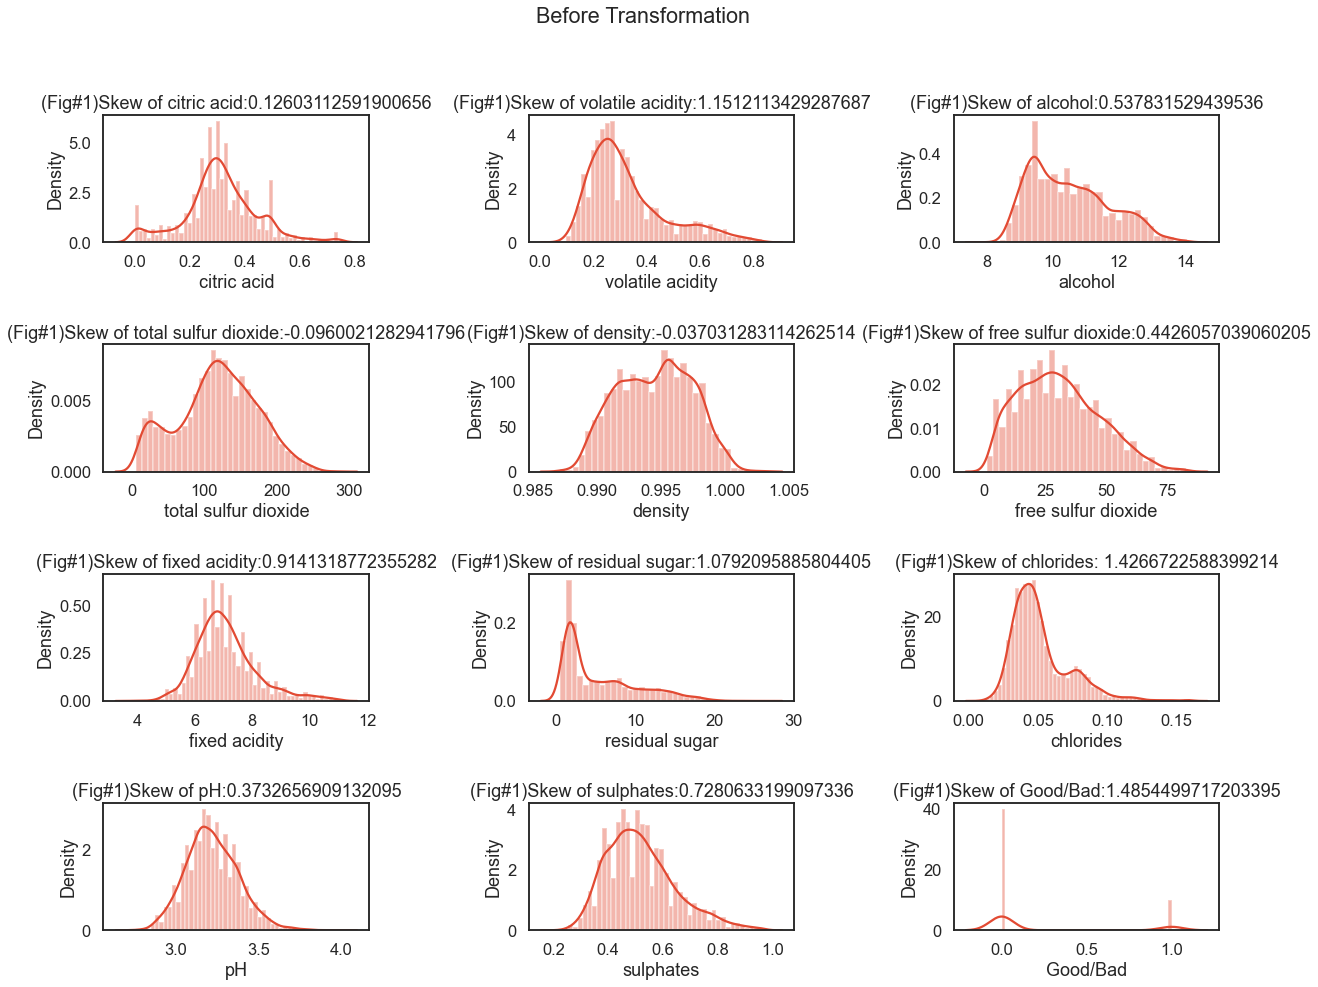

In [23]:
fig,ax=plt.subplots(4,3,figsize=(20,15))
plt.subplots_adjust(hspace=0.8,wspace=0.6)
fig.suptitle("Before Transformation")
ax=ax.flatten()
sns.distplot(df_clean["citric acid"],ax=ax[0])
sns.distplot(df_clean["volatile acidity"],ax=ax[1])
sns.distplot(df_clean["alcohol"],ax=ax[2])
sns.distplot(df_clean["total sulfur dioxide"],ax=ax[3])
sns.distplot(df_clean["density"],ax=ax[4])
sns.distplot(df_clean["free sulfur dioxide"],ax=ax[5])
sns.distplot(df_clean["fixed acidity"],ax=ax[6])
sns.distplot(df_clean["residual sugar"],ax=ax[7])
sns.distplot(df_clean["chlorides"],ax=ax[8])
sns.distplot(df_clean["pH"],ax=ax[9])
sns.distplot(df_clean["sulphates"],ax=ax[10])
sns.distplot(df_clean["Good/Bad"],ax=ax[11])

ax[0].set_title("(Fig#1)Skew of citric acid:"+str(df_clean["citric acid"].skew()))
ax[1].set_title("(Fig#1)Skew of volatile acidity:"+str(df_clean["volatile acidity"].skew()))
ax[2].set_title("(Fig#1)Skew of alcohol:"+str(df_clean["alcohol"].skew()))
ax[3].set_title("(Fig#1)Skew of total sulfur dioxide:"+str(df_clean["total sulfur dioxide"].skew()))
ax[4].set_title("(Fig#1)Skew of density:"+str(df_clean["density"].skew()))
ax[5].set_title("(Fig#1)Skew of free sulfur dioxide:"+str(df_clean["free sulfur dioxide"].skew()))
ax[6].set_title("(Fig#1)Skew of fixed acidity:"+str(df_clean["fixed acidity"].skew()))
ax[7].set_title("(Fig#1)Skew of residual sugar:"+str(df_clean["residual sugar"].skew()))
ax[8].set_title("(Fig#1)Skew of chlorides: "+str(df_clean["chlorides"].skew()))
ax[9].set_title("(Fig#1)Skew of pH:"+str(df_clean["pH"].skew()))
ax[10].set_title("(Fig#1)Skew of sulphates:"+str(df_clean["sulphates"].skew()))
ax[11].set_title("(Fig#1)Skew of Good/Bad:"+str(df_clean["Good/Bad"].skew()))

For normal distribution Skew fo curve should be equal to zero,so As you can see there are many columns which skew very high and very low 
**Hence many columns are not normally distributed, so we are going to perform Different Transformations methode**.

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
boxcox1=PowerTransformer('box-cox').fit_transform(df_clean[["pH"]])
df_clean["pH"]=boxcox1
boxcox2=PowerTransformer('box-cox').fit_transform(df_clean[["chlorides"]])
df_clean["chlorides"]=boxcox2
boxcox3=PowerTransformer('box-cox').fit_transform(df_clean[["volatile acidity"]])
df_clean["volatile acidity"]=boxcox3
boxcox4=PowerTransformer('box-cox').fit_transform(df_clean[["alcohol"]])
df_clean["alcohol"]=boxcox4
boxcox5=PowerTransformer('box-cox').fit_transform(df_clean[["sulphates"]])
df_clean["sulphates"]=boxcox5
boxcox6=PowerTransformer('box-cox').fit_transform(df_clean[["residual sugar"]])
df_clean["residual sugar"]=boxcox6
boxcox7=PowerTransformer('box-cox').fit_transform(df_clean[["fixed acidity"]])
df_clean["fixed acidity"]=boxcox7

Text(0.5, 1.0, '(Fig#1)Skew of density:-0.037031283114262514')

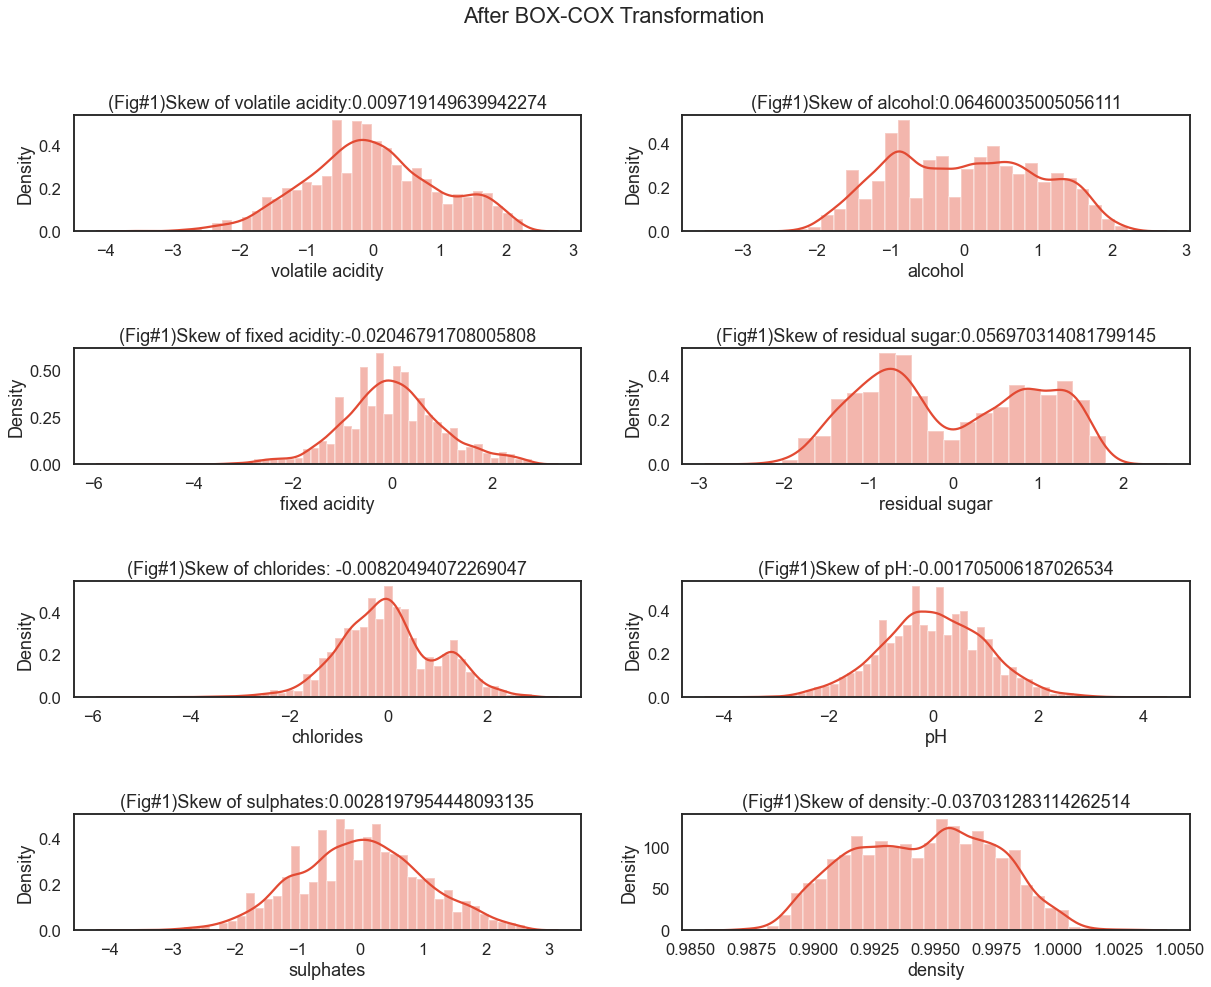

In [26]:
fig,ax=plt.subplots(4,2,figsize=(20,15))
plt.subplots_adjust(hspace=1)
fig.suptitle("After BOX-COX Transformation")
ax=ax.flatten()
sns.distplot(df_clean["volatile acidity"],ax=ax[0])
sns.distplot(df_clean["alcohol"],ax=ax[1])
sns.distplot(df_clean["fixed acidity"],ax=ax[2])
sns.distplot(df_clean["residual sugar"],ax=ax[3])
sns.distplot(df_clean["chlorides"],ax=ax[4])
sns.distplot(df_clean["pH"],ax=ax[5])
sns.distplot(df_clean["sulphates"],ax=ax[6])
sns.distplot(df_clean["density"],ax=ax[7])

ax[0].set_title("(Fig#1)Skew of volatile acidity:"+str(df_clean["volatile acidity"].skew()))
ax[1].set_title("(Fig#1)Skew of alcohol:"+str(df_clean["alcohol"].skew()))
ax[2].set_title("(Fig#1)Skew of fixed acidity:"+str(df_clean["fixed acidity"].skew()))
ax[3].set_title("(Fig#1)Skew of residual sugar:"+str(df_clean["residual sugar"].skew()))
ax[4].set_title("(Fig#1)Skew of chlorides: "+str(df_clean["chlorides"].skew()))
ax[5].set_title("(Fig#1)Skew of pH:"+str(df_clean["pH"].skew()))
ax[6].set_title("(Fig#1)Skew of sulphates:"+str(df_clean["sulphates"].skew()))
ax[7].set_title("(Fig#1)Skew of density:"+str(df_clean["density"].skew()))


Now the features columns are normally distributed,Now we can further proceed

### Create dummies of object columns:

In [27]:
df_clean["type"]=pd.get_dummies(df['type'],drop_first=True)

In [28]:
X=df_clean.drop("Good/Bad",axis=1).values
y=df_clean["Good/Bad"].values

># Step 6: Do Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler(X)

># Step 7:Split the dataset into test and train and then fit and predict the models

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Accuracy Function:

In [31]:
#i am going to create a function to find the accuracy of models
def accuracy(y_true,y_pred):
    acc = np.sum(y_true==y_pred)/len(y_true)
    return acc

In [32]:
# this is RootMean Square Error .which is to find out the error ratio of models
def RMSE(y_true,y_pred):
    RMSE = np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())
    return RMSE

## Confusion Metrics Fuction

In [33]:
def confusionMatrix(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1
            
                
    cm = [[tn, fp], [fn, tp]]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sens = tp/(tp+fn)
    prec = tp/(tp+fp)
    fm = (2*prec*sens)/(prec+sens)
    return print("Comfusion metrics:",cm),print("Accuracy:",accuracy),print("Precision:",prec),print("Sensitivity:",sens),print("f1_score",fm)
           

> # Step 8: Model Training

##  Logistic Regression:
Now we are going to create a class of **LogisticRegression**.this class will use to fit Dataset and predict the Target column.
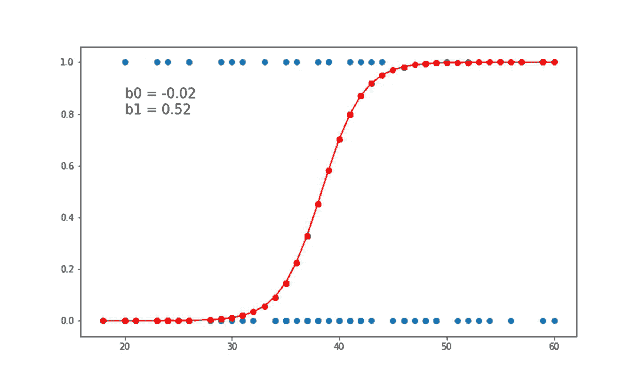
This curve is a regression curve. This curve is sigmoid. We are going to use logistic regression for binary classification, so this model will predict results in 0 and 1 format, 0 means not left and 1 means left.
Sigmoin Function:<br><br>
      $f(x)$=1$/$1+e$^$-x<br><br>

         
**Structure of Class:**<br>
This class contains three functions: <font color=blue>_init__function</font> ,<font color=blue>sigmoid function</font>,<font color=red>fit function</font>,<font color=green>predict function </font>.<br>
1. <font color=blue>_init__function</font>:<br>
    This function is used to initiate the class and passing arguments.
2. <font color=blue>sigmoid function</font>:<br>
    This function contains the formula of sigmoid function and passes the argument x which will we train data.<br>
3. <font color=red>fit function</font>:<br>
     
     in the fit function, we perform the cost function to minimize the error. in for loop in every iteration, the error will reduce by taking the learning rate step. and in every iteration, the weight and bias will also update. this fit function will help to find the best weight and bias of data.
     
4. <font color=green>predict function </font>:<br>
  this fuction will predict our Target values.
 * first create a model variable = Trainingdata$*$Weights $+$ Bias
 * weights = coefficients of data
 * bias = intercepts


In [34]:
class LogisticRegression:
    def __init__(self,lr=0.001,n_iters=1000):      
        self.lr =lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    #Sigmoid method
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    #Method for calculating the gradients
    

    
    def fit(self,x,y):
        m,n = x.shape
        self.weights =np.zeros(n)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_model = np.dot(x,self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1/n)*np.dot(x.T,(y_pred-y))
            db = (1/n)*np.sum(y_pred-y)
            
            #Updating the weights
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
    
    #Method to predict the class label.
    def predict(self, x):
        linear_model = np.dot(x,self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        Y_pred_final = [1 if i >0.5 else 0 for i in y_pred]
        return np.array(Y_pred_final)


In [35]:
lr=LogisticRegression(lr=0.001,n_iters=4000)
lr.fit(X_train,y_train)

In [36]:
y_pred_lr=lr.predict(X_test)

In [37]:
print(accuracy(y_test,y_pred_lr)*100,"%")

78.65416436845008 %


>#  Step 9: do HyperParameter Tuning to find the best hyperparameters for models.
### HyperParameter Tuning of LogisticRegression model

In [38]:
rmse =list()
learning_rate=np.linspace(0.1,0.000001,15)
for i in learning_rate:
    LR=LogisticRegression(lr=i)
    LR.fit(X_train,y_train)
    y_pred_lr=LR.predict(X_test)
    rmse_1 = RMSE(y_test,y_pred_lr)
    rmse.append(rmse_1)

Text(0, 0.5, 'Error Rate')

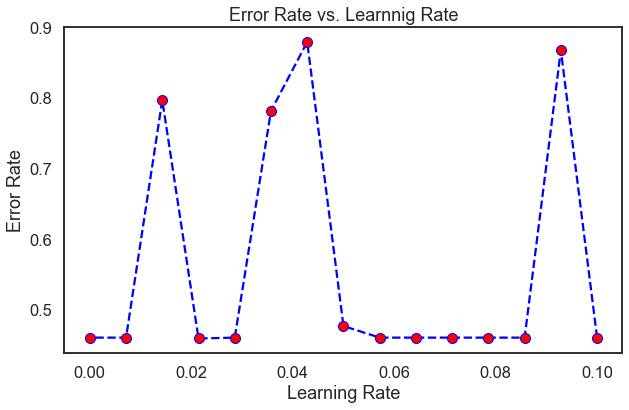

In [39]:
plt.figure(figsize=(10,6))
plt.plot(learning_rate,rmse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Learnnig Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Error Rate')

This plot shows that at learning rate 0.01 and between 0.06,0.008 Error rate is very low

## Creating Confusion matrix and Checking Precision,Sensitivity,Accuracy and F1 Score of model(LogisticRegression)

In [40]:
def cm_lr(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1
                
    cm = [[tn, fp], [fn, tp]]
    return cm

[[1427, 0], [386, 0]]

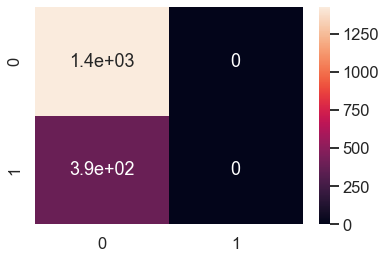

In [41]:
sns.heatmap(cm_lr(y_test,y_pred_lr),annot=True)
cm_lr(y_test,y_pred_lr)

## Plot Weights of LogisticRegression:
Weights are the Coefficient of features values, so for ideal model weights should be alomost equal to zero, so for checking wether weights are equal to zero or not i going to plot weights of model.

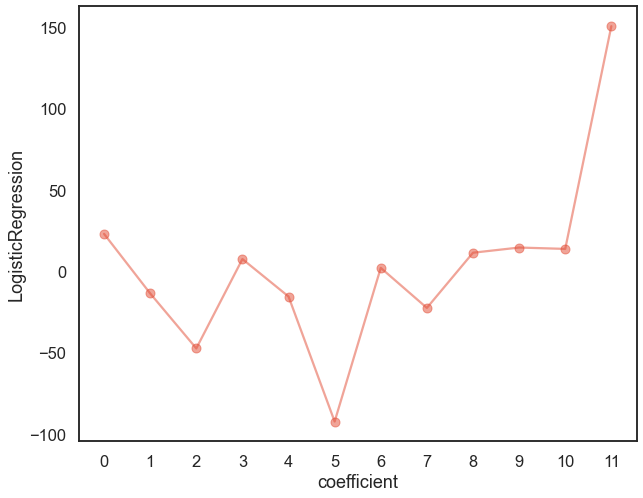

In [116]:
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.plot(lr.weights.ravel() ,marker ='o',label ='LogisticRegression' ,alpha=.5)
ax.set(xlabel = 'coefficient',ylabel ='LogisticRegression')
ax.set_xticks(range(len(lr.weights)))

As you can see these coefficients are very high they very away from zero

**best learning rate is 0.03**

In [145]:
lr=LogisticRegression(lr=0.03,n_iters=4000)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [146]:
print(accuracy(y_test,y_pred_lr)*100, "%")

75.5 %


## KNearestNeighbors Classifier:
![KNN_final1_ibdm8a.png.jpg](attachment:KNN_final1_ibdm8a.png.jpg)
 
 the k-nearest neighbor's algorithm (k-NN) is a non-parametric classification method. It is used for classification and regression. In both cases, the input consists of the k closest training examples in the data set. so we find the closest K(neighbor) value to the data points, so to find the nearest neighbor going to use the distance formula:
 **d=$√$(($x2-x1$)²$+$($y2-y1$)$²$)**
Structure of Class:<br>
  This class contains seven functions:<br>
1. <font color=blue>_init__function</font>:<br>
    This function is used to initiate the class and passing arguments.
2. <font color=blue>Train function</font>:<br>
    This function is pass X_train and y_train arguments.<br>
3. <font color=blue>predict function</font>:<br>
     This function will predict y_test if number of loops =2 then compute_distance_two_loop will execute,if number of loops =1 then then compute_distance_one_loop will execut and if number of loops= 0 then compute_distance_vectorized function will execute.
4. <font color=blue>compute_distance_vectorized </font>:<br>
this function contains the distance formula in vectorized form<br><br>
step#1: (A-B)^2 = A^2 - 2AB + b^2 :whole square formula A =X_test , B =X_train So:<br><br>
* find A^2=X_test_squared = np.sum(X_test^2,axis=1,keepdims=True) **and**<br><br> 
* B^2 = X_train_squared =X_train_squared = np.sum(self.X_train**2,axis=1,keepdims=True)

step#2:Find 2AB = Two_train_test=np.dot(X_test,self.X_train.T).<br><br>
step#3: create a distance formula (√A^2 - 2AB + b^2) as<br><br>
np.sqrt(epocs + X_test^2 - 2*X_test*X_train + X_train.T)<br>
5. <font color=blue>compute_distance_one_loop </font>:<br>
   this function also contains distance formula but with for loop <br>
6. <font color=blue>compute_distance_two_loops </font>:<br>
   this function also contains distance formula but with for loop<br>
7. <font color=blue>predict_label </font>:<br>
   predict the x_test
    

In [119]:
class KNN():
    def __init__(self,k):
        self.k=k        # K is nearest Neighbour
        self.eps = 1e-8  # eps is number iterations epocs
    def train(self,X,y):
        self.X_train =X
        self.y_train = y
        
    def predict(self,X_test,num_loops=2):
        if num_loops ==2:
            distances = self.compute_distance_two_loops(X_test)
        elif num_loops ==1:
            distances =self.compute_distance_one_loop(X_test)
        else:
            distances =self.compute_distance_vectorized(X_test)
        return self.predict_label(distances)
    def compute_distance_vectorized(self,X_test):
        X_test_squared = np.sum(X_test**2,axis=1,keepdims=True)
        X_train_squared = np.sum(self.X_train**2,axis=1,keepdims=True)
        two_x_test_x_train =np.dot(X_test,self.X_train.T)
        # distance formula=Squareroot((a^2 - 2ab + b^2))
        return np.sqrt(self.eps+X_test_squared-2*two_x_test_x_train+X_train_squared.T)
    def compute_distance_one_loop(self,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))  
        for i in range(num_test):
            # distance formula=Squareroot(sum of (X_train-X_test)^2)
            distances[i:]=np.sqrt(self.eps+np.sum((self.X_train-X_test[i,:])**2,axis=1))
        return distances
    def compute_distance_two_loops(self,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
        
        for i in range(num_test):
            for j in range(num_train):
                # distance formula=Squareroot(sum of (X_train-X_test)^2)
                distances[i,j]=np.sqrt(self.eps+np.sum((X_test[i,:]-self.X_train[j,:])**2))
        return distances
    def predict_label(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        for i in range (num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i]=np.argmax(np.bincount(k_closest_classes))
        return y_pred

In [120]:
knn=KNN(k=1)
knn.train(X_train,y_train)

In [121]:
y_pred_knn=knn.predict(X_test,num_loops=0)

In [122]:
print(accuracy(y_test,y_pred_knn)*100,"%")

81.02592388306674 %


### HyperParameter Tuning of KNearestNeighbours:

In [123]:
rmse =[]
for i in range(1,12):
    knn=KNN(k=i)
    knn.train(X_train,y_train)
    y_pred_knn=knn.predict(X_test,num_loops=0)
    rmse_1 = RMSE(y_test,y_pred_knn)
    rmse.append(rmse_1)

Text(0, 0.5, 'Error Rate')

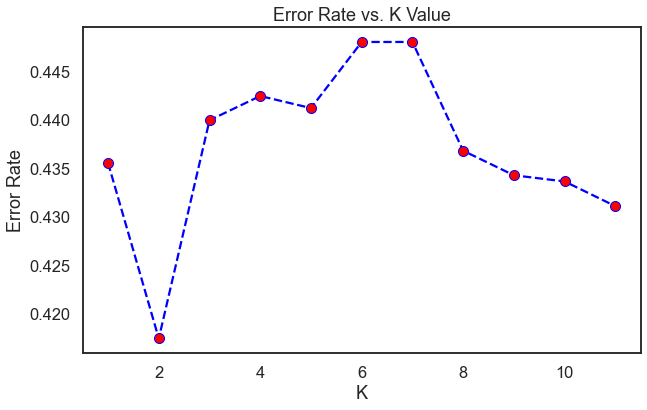

In [124]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),rmse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Best value for k is 2**

In [125]:
knn=KNN(k=2)
knn.train(X_train,y_train)
y_pred_knn=knn.predict(X_test,num_loops=0)
print(accuracy(y_test,y_pred_knn)*100,"%")

82.57032542746828 %


In [126]:
def cm_knn(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1
                
    cm = [[tn, fp], [fn, tp]]
    return cm

In [127]:
confusionMatrix(y_test,y_pred_knn)

Comfusion metrics: [[1390, 63], [253, 107]]
Accuracy: 0.8257032542746828
Precision: 0.6294117647058823
Sensitivity: 0.2972222222222222
f1_score 0.4037735849056604


(None, None, None, None, None)

<AxesSubplot:>

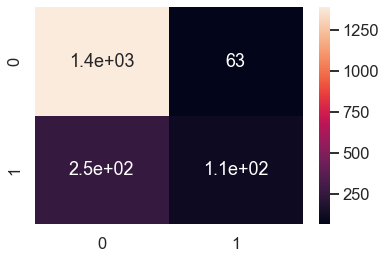

In [128]:
sns.heatmap(cm_knn(y_test,y_pred_knn),annot=True)

## Support Vector  Classifier:
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each categor<br>
**Alogrithm of SVM:**
* yi(xi.w+b) <= -1 (belongs to -ve class)
* yi(xi.w+b) >= 1	if yi = +1 (belongs to +ve class)
* w = weighhts of model/coefficient
* b=bias of model/intercept
* xi=X_train values
* yi=Y_train values
* SVM predict values between -1 and 1 ,-1 is -ve class and 1 is +ve class.
* For decision Boundary yi(xi.w+b)=0 here xi belongs to point in decision boundat
* Our Objective is to maximize Weight W.
 * W = ((X+ - X-).w)/|w|
* It is not necessary that support vector lines always pass through support vectors
* It is a Convex Optimization problem and will always lead to a global minimum
* if not yi(xi.w+b)>=1 for all points then break
* Else find |w| and put it in dictionary as key and (w,b) as values
**Methode:**<br>
make a for loop:<br>
 * if yi(xi.w+b) >= 1<br>
  * then lambda (2 * ||w||^2<br>
 * else w = lambda ||w||^2 + 1 - yi(xi-b) 

In [141]:
class SVM:

    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                            # yi*      (      xi   *  w - b)
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Hinge loss function max(0,1-yi(w.xi-b))
                    #         lambda  * (2 * lamabda_parameter * ||w|| )
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    #          lambda *  (2 *     lambda_param  *  w  -           xi*yi)
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [142]:
df_clean=df_clean.iloc[:2000,:]
X=df_clean.drop("Good/Bad",axis=1).values
y=df_clean["Good/Bad"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [143]:
svm=SVM()
svm.fit(X_train,y_train)

In [144]:
y_pred=svm.predict(X_test)
y_pred_svm = [0 if x==-1 else 1 for x in y_pred]
np.unique(y_pred)
print(accuracy(y_test,y_pred_svm)*100,"%")

75.5 %


### Hypreparameter Tuning of SVC:

In [133]:
rmse =list()
learning_rate_s=np.linspace(0.1,0.000001,5)
for i in learning_rate_s:
    svm=SVM(learning_rate=i)
    svm.fit(X_train,y_train)
    y_pred_svm=svm.predict(X_test)
    rmse_1 = RMSE(y_test,y_pred_svm)
    rmse.append(rmse_1)

Text(0, 0.5, 'Error Rate')

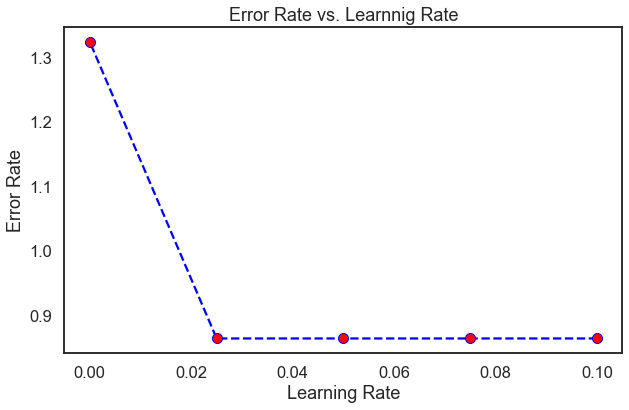

In [134]:
plt.figure(figsize=(10,6))
plt.plot(learning_rate_s,np.array(rmse),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Learnnig Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Error Rate')

In [135]:
svm=SVM(learning_rate=0.02)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
y_pred_svm = [0 if x==-1 else 1 for x in y_pred]
np.unique(y_pred)
print(accuracy(y_test,y_pred_svm)*100,"%")

25.166666666666664 %


In [136]:
def cm_svm(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1
                
    cm = [[tn, fp], [fn, tp]]
    return cm

<AxesSubplot:>

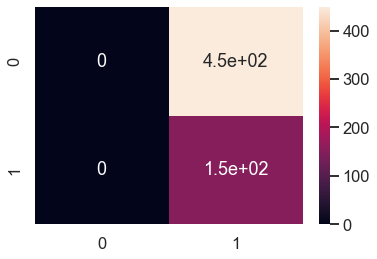

In [137]:
sns.heatmap(cm_svm(y_test,y_pred_svm),annot=True)

># Step 10: Give Conclusion:

## Exploratory Data analysis:
With the help of exploratory data analysis. We have found out that most features have linear relationship and they are strogngly correlated with each other and most of the features columns were not normally distributed but now their skew is almost zerp<br>
**Conclusion of Analysis:**<br>
 Alcohol colum has stronger relation with target column.

## Model Training:
For Model Training first, we remove outliers and normally distributed the data, and then did feature scaling. We have created 3 Classification models and after Hyperparameter tuning we see the following results.
1. <font color =blue>Logistic</font> has above <font color =red>80%</font> accuracy.
2. <font color =blue>KnearestNeighbours</font> has above  <font color =red>81%</font> accuracy.
3. <font color =blue>Support vector Classifier</font> has above  <font color =red>76%</font> accuracy.

**END**